In [126]:
import pickle
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [127]:
model_name = 'DQN'
brain_name = 'DQN brain - 03 02 2023, 07:16:14 - 00100'
outcome_log_name = '03 03 2023, 13:23:07'

outcome_log_path = f"./models/{model_name}/{brain_name}/outcome_logs/eval/bin/{outcome_log_name}"
outcome_log_path = "/home/serapf/Desktop/FakeNewsRL/models/DQN/DQN brain - 03 02 2023, 07:16:14 - 00100/outcome_logs/eval/bin/03 03 2023, 13:23:07"

In [128]:
with open(outcome_log_path, "rb") as fp:   # Unpickling
    outcome_logs = pickle.load(fp)

In [134]:
#outcome_logs[2]
text_list[0]

' \n Florida Advances Bill That Would Ban Making White People Feel Bad About Racism, and No, That’s Not a Joke \n Vanity Fair\n\n On January 17, 2023, Condé Nast’s Privacy Policy was updated to clarify existing disclosures about our processing of personal information, and to include rights available to some users under applicable local law.\n By using our products and services, you agree to the updated Privacy Policy and User Agreement, which can be found in the website footer.\n Skip to main contentOpen Navigation MenuMenuStory SavedTo revist this article, visit My Profile, then View saved stories.\n Close AlertStory SavedTo revist this article, visit My Profile, then View saved stories.\n LondonMagazineRon DeSantis appears at a news conference September 1.\xa0\n Paul Hennessy\nSOPA Images\nLightRocket via Getty ImagesFloridaFlorida Advances Bill\n That Would Ban Making White People Feel Bad About Racism, and No, That’s Not a JokeThe bill would ban public schools and private businesse

In [135]:
real_list = []
predict_list = []

text_list = [' ',' ']
certainty_list = [[],[],[],[]]

for log in outcome_logs:
    if log['outcome'] != -1:
        real_list.append(log['label'])
        predict_list.append(log['outcome'])
        
        if log['outcome'] == 0:
            str_con = " ".join(log['disagree_list'])
            text_list[0] = text_list[0] + "\n " + str_con
        else:
            str_con = " ".join(log['agree_list'])
            text_list[1] = text_list[1] + "\n " + str_con
        
        index = log['outcome'] + 2*log['label']
        
        certainty_list[index].append(log['certantiy'])


    

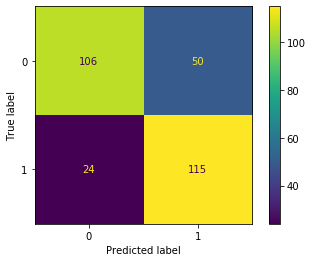

In [136]:

confusion_matrix = metrics.confusion_matrix(real_list, predict_list)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show() 

In [137]:
len(certainty_list[3])

115

In [138]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt



The mean of the sample is:  3.278830517406751
The standard deviation of the sample is:  0.42840300108145973
The mean of the sample is:  1.635468489161056
The standard deviation of the sample is:  1.5081126808198586
The mean of the sample is:  2.9999931161338917
The standard deviation of the sample is:  0.742072529987917
The mean of the sample is:  2.8935793347636407
The standard deviation of the sample is:  0.9903120562565421


<ipython-input-139-7941bd003eb7>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(arr, hist=False)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


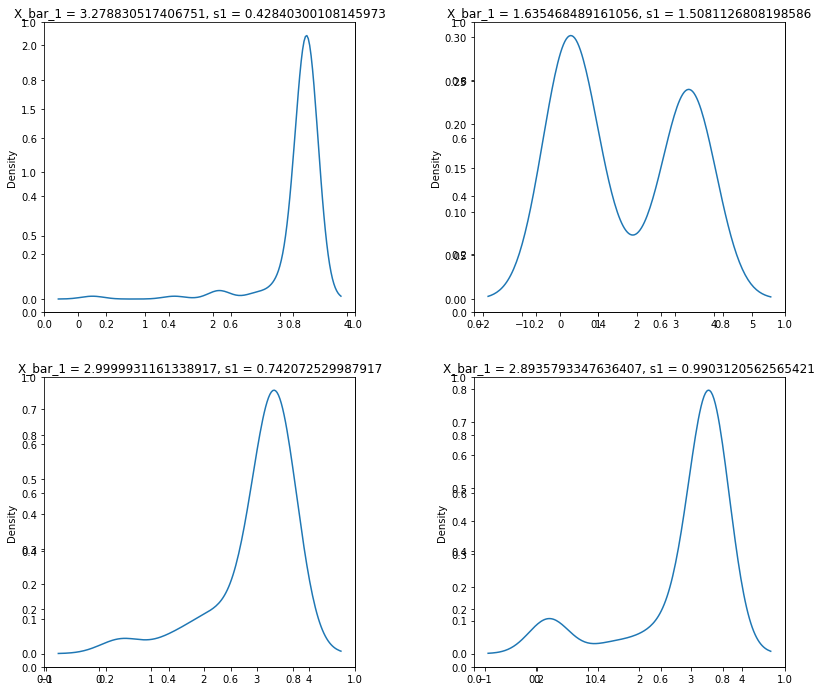

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    arr = numpy.array(certainty_list[i])
    x_bar = np.mean(arr)
    print("The mean of the sample is: ", str(x_bar))
    s = np.std(arr)
    print("The standard deviation of the sample is: ", str(s))

    sns.distplot(arr, hist=False)
    title = "X_bar_1 = " + str(x_bar) + ", s1 = "+ str(s)
    plt.title(title)

fig.tight_layout()
plt.show()

In [159]:

import spacy
nlp = spacy.load("en_core_web_md")
nlp.Defaults.stop_words.add("\n")
nlp.Defaults.stop_words.add("\n\n ")
nlp.Defaults.stop_words.add("\n \n ")
nlp.Defaults.stop_words.add("\xa0")
doc_T = nlp(text_list[1])
doc_F = nlp(text_list[0])

In [163]:

#remove stopwords and punctuations
from collections import Counter
words_T = [token.text for token in doc_T if token.is_stop != True and token.is_punct != True]
word_freq_T = Counter(words_T)
common_words_T = word_freq_T.most_common(40)
print (common_words_T)

print ("-----------------------------------------------")

#remove stopwords and punctuations
from collections import Counter
words_F = [token.text for token in doc_F if token.is_stop != True and token.is_punct != True]
word_freq_F = Counter(words_F)
common_words_F = word_freq_F.most_common(40)
print (common_words_F)

[('Trump', 209), ('News', 182), ('said', 152), ('U.S.', 139), ('Reuters', 111), ('Yahoo', 108), ('World', 79), ('Sign', 78), ('$', 71), ('tax', 70), ('new', 70), ('Syria', 68), ('North', 66), ('Turkey', 65), ('President', 62), ('China', 60), ('Search', 57), ('Biden', 54), ('news', 52), ('country', 52), ('USD', 52), ('Russia', 51), ('House', 50), ('New', 50), ('State', 48), ('Home', 47), ('government', 47), ('Korea', 47), ('Republican', 47), ('says', 46), ('United', 46), ('Africa', 44), ('people', 44), ('Markets', 42), ('Turkish', 42), ('Fed', 42), ('year', 41), ('FBI', 41), ('2017', 40), ('media', 40)]
-----------------------------------------------
[('Trump', 534), ('said', 378), ('News', 304), ('people', 226), ('Biden', 217), ('U.S.', 199), ('Video', 164), ('Obama', 145), ('Twitter', 144), ('Ad', 141), ('CNN', 132), ('time', 130), ('House', 127), ('White', 126), ('President', 124), ('State', 122), ('Donald', 115), ('Brussels', 114), ('Feedback', 112), ('Share', 111), ('like', 110), (

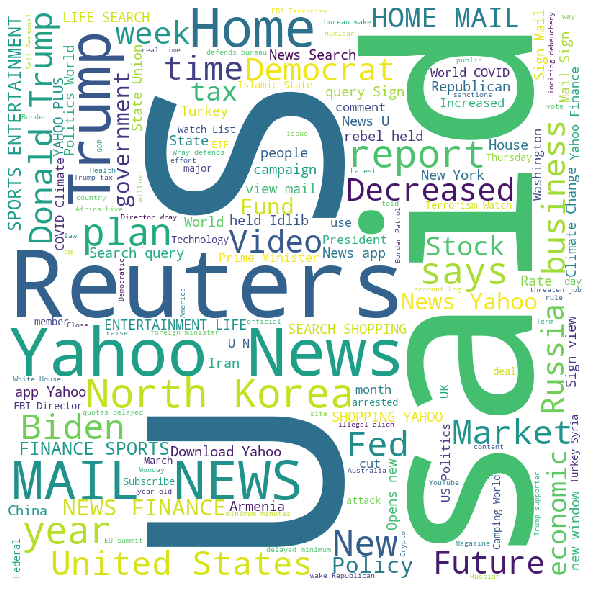

In [164]:
from wordcloud import WordCloud, STOPWORDS

palabras = " ".join(words_T)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(palabras)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

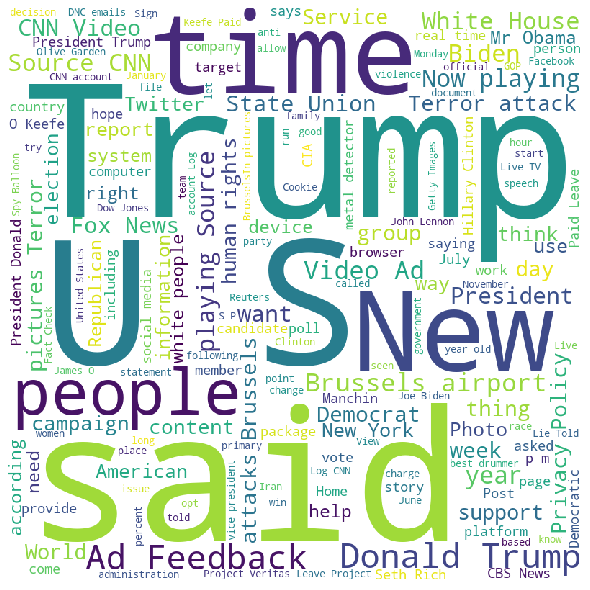

In [165]:
from wordcloud import WordCloud, STOPWORDS

palabras = " ".join(words_F)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(palabras)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()